In [1]:
import pandas as pd

# import data 
data = pd.read_csv("data/dataset-tbp.csv")

# head
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

# Eksplorasi Data

In [2]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Distribusi Variabel Target

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


<Axes: title={'center': 'Distribusi Bankrupt?'}, xlabel='Bankrupt?'>

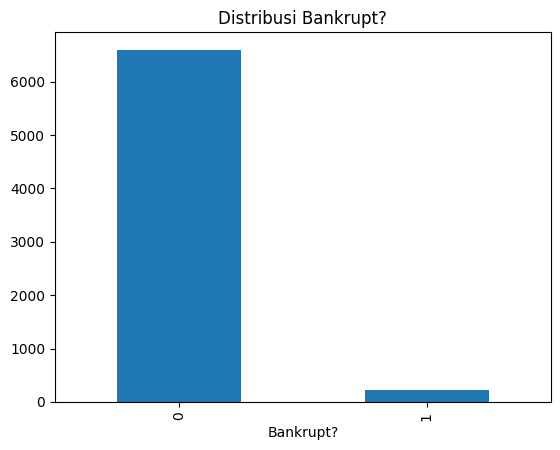

In [3]:
# dalam angka
print(data['Bankrupt?'].value_counts())

# visualisasi
data['Bankrupt?'].value_counts().plot(kind='bar', title='Distribusi Bankrupt?')

## Distribusi Variabel Fitur

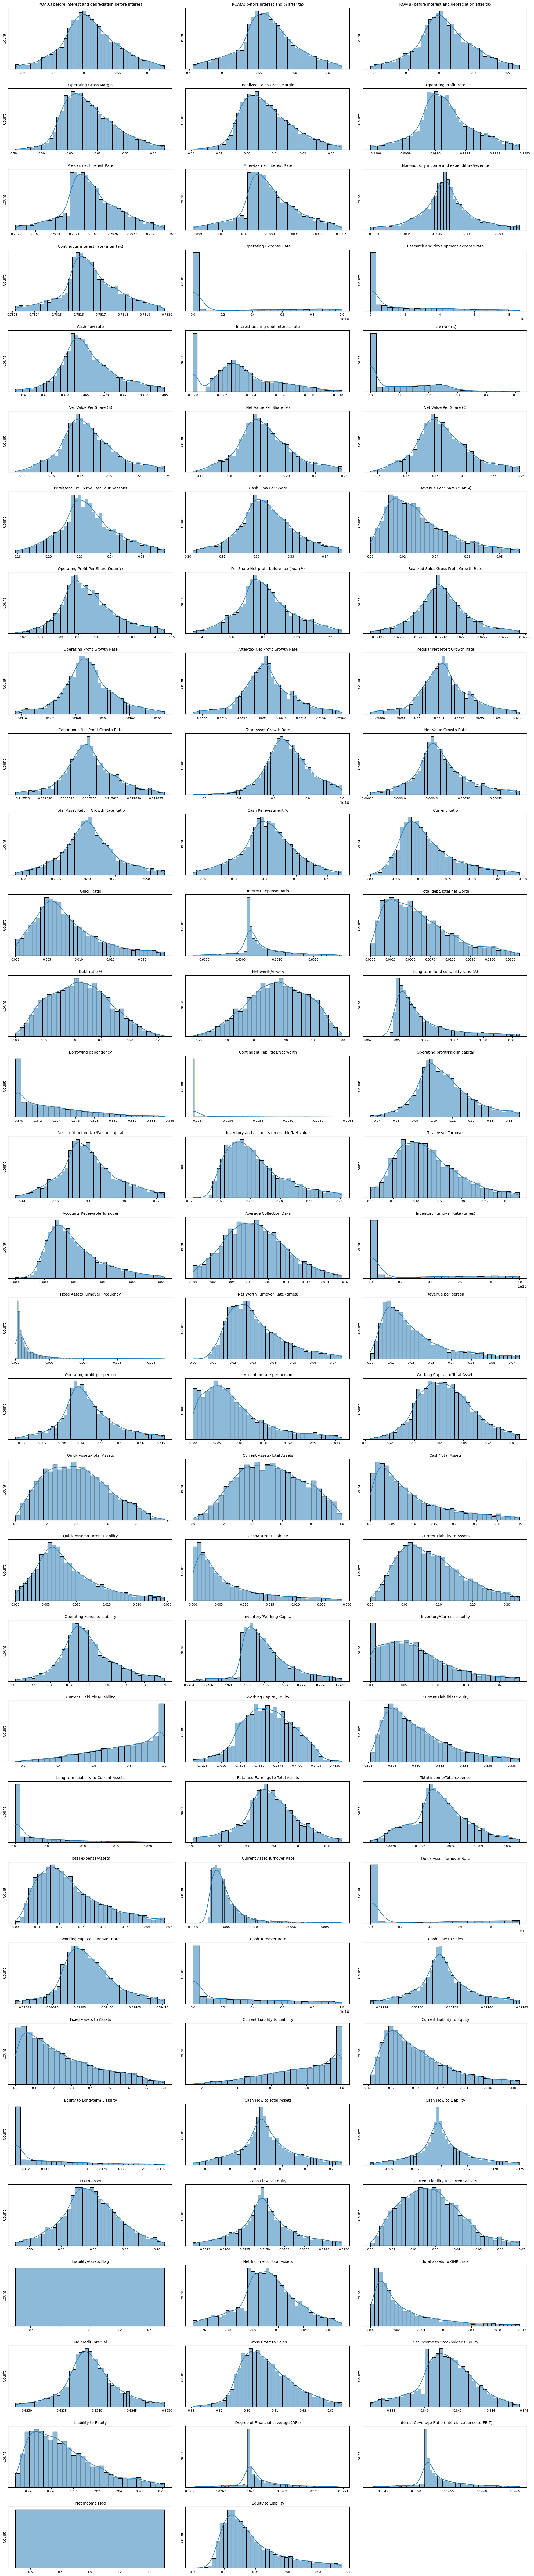

In [4]:
import seaborn as sns
import numpy as np
import math

import matplotlib.pyplot as plt

# Remove the target variable
feature_columns = [col for col in data.columns if col != 'Bankrupt?']

# Calculate grid dimensions - approximately a square grid
n_features = len(feature_columns)
n_cols = 3  # We'll use 3 columns
n_rows = math.ceil(n_features / n_cols)

# Set up the plot with a reasonable figure size
plt.figure(figsize=(20, n_rows * 3))

# Create histograms for each feature
for i, column in enumerate(feature_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Use a more robust approach to determine bin range for better visualization
    # Handle extreme values and outliers
    values = data[column].values
    q1, q3 = np.percentile(values, [25, 75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Filter out extreme outliers for better visualization
    filtered_values = values[(values >= lower_bound) & (values <= upper_bound)]
    
    if len(filtered_values) > 0:  # If we have values after filtering
        sns.histplot(filtered_values, kde=True)
    else:  # If all values were filtered out, use original data
        sns.histplot(values, kde=True)
    
    plt.title(column, fontsize=10)
    plt.xlabel('')
    plt.yticks([])
    plt.xticks(fontsize=8)

plt.tight_layout()
plt.show()

# Feature Selection

## Tabel nilai korelasi

In [5]:
# melihat korelasi dengan target
correlation_matrix_target = data.corr()['Bankrupt?'].sort_values(ascending=False)
correlation_matrix_target

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

## Melihat signifikansi dengan oneway-anova

In [6]:
from scipy.stats import f_oneway

num_cols = data.select_dtypes(include='number').columns.drop('Bankrupt?')
results = []
for col in num_cols:
    group0 = data[data['Bankrupt?']==0][col]
    group1 = data[data['Bankrupt?']==1][col]
    f_stat, p_val = f_oneway(group0, group1)
    results.append({'feature': col, 'f_stat': f_stat, 'p_value': p_val})

# Buat DataFrame hasil
import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('p_value')

# Tampilkan fitur dengan p-value < 0.05 (signifikan)
print(results_df[results_df['p_value'] < 0.05])

                                              feature      f_stat  \
85                         Net Income to Total Assets  753.348894   
1              ROA(A) before interest and % after tax  593.228629   
2    ROA(B) before interest and depreciation after...  549.202093   
0    ROA(C) before interest and depreciation befor...  497.535121   
36                                       Debt ratio %  455.091151   
37                                   Net worth/Assets  455.091151   
18            Persistent EPS in the Last Four Seasons  345.267517   
67                  Retained Earnings to Total Assets  339.411396   
42              Net profit before tax/Paid-in capital  307.823235   
22           Per Share Net profit before tax (Yuan ¥)  288.185465   
59                        Current Liability to Assets  268.012458   
53                    Working Capital to Total Assets  263.987646   
89                 Net Income to Stockholder's Equity  230.861805   
39                               B

d:\Python\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Buat dataframe baru dengan fitur-fitur signifikan

In [7]:
# dataframe baru dengan fitur signifikan
significant_features = results_df[results_df['p_value'] < 0.05]['feature'].tolist()
data_significant = data[significant_features + ['Bankrupt?']]

# tampilkan dataframe baru
data_significant.head()

Net Income to Total Assets   ROA(A) before interest and % after tax  \
0                     0.716845                                 0.424389   
1                     0.795297                                 0.538214   
2                     0.774670                                 0.499019   
3                     0.739555                                 0.451265   
4                     0.795016                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    ROA(C) before interest and depreciation before interest   Debt ratio %  \
0                                           0.370594              0.207576   
1                                           0.464291              0.171176   
2                                           0.426071              0.207516   
3                                           0.399844              0.151465   
4                                           0.465022              0.106509   

    Net worth/Assets   Persistent EPS in the Last Four Seasons  \
0           0.792424                                  0.169141   
1           0.828824                                  0.208944   
2           0.792484                                  0.180581   
3           0.848535                                  0.193722   
4           0.893491                                  0.212537   

    Retained Earnings to Total Assets   Net profit before tax/Paid-in capital  \
0                            0.903225                                0.137757   
1                            0.931065                                0.168962   
2                            0.909903                                0.148036   
3                            0.906902                                0.147561   
4                            0.913850                                0.167461   

    Per Share Net profit before tax (Yuan ¥)  ...   Total Asset Growth Rate  \
0                                   0.138736  ...              4.980000e+09   
1                                   0.169918  ...              6.110000e+09   
2                                   0.142803  ...              7.280000e+09   
3                                   0.148603  ...              4.880000e+09   
4                                   0.168412  ...              5.510000e+09   

    Cash Flow to Liability   Revenue per person  \
0                 0.458609             0.034164   
1                 0.459001             0.006889   
2                 0.459254             0.028997   
3                 0.448518             0.015463   
4                 0.454411             0.058111   

    After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate  \
0                           0.688979                         0.688979   
1                           0.689693                         0.689702   
2                           0.689463                         0.689470   
3                           0.689110                         0.689110   
4                           0.689697                         0.689697   

    Total assets to GNP price   Quick Asset Turnover Rate   Quick Ratio  \
0                    0.009219                6.550000e+09      0.001208   
1                    0.008323                7.700000e+09      0.004039   
2                    0.040003                1.022676e-03      0.005348   
3                    0.003252                6.050000e+09      0.002896   
4                    0.003878                5.050000e+09      0.003727   

    Research and development expense rate  Bankrupt?  
0                                     0.0          1  
1                                     0.0          1  
2                   

# Prepocessing

## Oversampling

In [10]:
import imblearn
from imblearn.over_sampling import SMOTE

# pisahkan fitur dan target
X = data_significant.drop('Bankrupt?', axis=1)
y = data_significant['Bankrupt?']

# inisialisasi SMOTE
smote = SMOTE(random_state=42)

# apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

In [11]:
# gabungkan kembali ke dalam satu dataframe
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# cek distribusi setelah oversampling
print(data_resampled['Bankrupt?'].value_counts())

Bankrupt?
1    6599
0    6599
Name: count, dtype: int64


In [12]:
# splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# print shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (10558, 59)
X_test shape: (2640, 59)


# Modelling

## Decision Tree

In [13]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# inisialisasi model
dt = DecisionTreeClassifier(random_state=42)

# fit model
dt.fit(X_train, y_train)

# prediksi
y_pred = dt.predict(X_test)

# evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1245   75]
 [  45 1275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1320
           1       0.94      0.97      0.96      1320

    accuracy                           0.95      2640
   macro avg       0.95      0.95      0.95      2640
weighted avg       0.95      0.95      0.95      2640

Accuracy: 0.9545454545454546


## Logistic Regression

In [14]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# inisialisasi model
lr = LogisticRegression(max_iter=1000, random_state=42)

# fit model
lr.fit(X_train, y_train)

# prediksi
y_pred_lr = lr.predict(X_test)

# evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Confusion Matrix:
[[1010  310]
 [ 764  556]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.77      0.65      1320
           1       0.64      0.42      0.51      1320

    accuracy                           0.59      2640
   macro avg       0.61      0.59      0.58      2640
weighted avg       0.61      0.59      0.58      2640

Accuracy: 0.5931818181818181


## Random Forest

In [15]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# inisialisasi model
rf = RandomForestClassifier(random_state=42)

# fit model
rf.fit(X_train, y_train)

# prediksi
rf.fit(X_train, y_train)

# prediksi
y_pred_rf = rf.predict(X_test)

# evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
[[1267   53]
 [  11 1309]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1320
           1       0.96      0.99      0.98      1320

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

Accuracy: 0.9757575757575757
